In [1]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

In [2]:
import glob
import os



In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf


In [4]:
# #da=os.path.join('D:/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Circumferential Crack/BR_CC_0.47 LPS_A2.csv')
# df = pd.read_csv(r'D:/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Circumferential Crack/BR_CC_0.47 LPS_A2.csv')
# #df = pd.read_csv(r'C:\Users\Ron\Desktop\products_sold.csv')
# print(df)

In [5]:
Circumferential = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Looped/Circumferential Crack', "*.csv"))

cir = pd.concat((pd.read_csv(f) for f in Circumferential),axis = 1, ignore_index=True)


Gasket = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Looped/Gasket Leak', "*.csv"))

gas = pd.concat((pd.read_csv(g) for g in Gasket),axis = 1, ignore_index=True)


Longitudinal = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Looped/Longitudinal Crack', "*.csv"))

long = pd.concat((pd.read_csv(k) for k in Longitudinal),axis = 1, ignore_index=True)


NonLeak = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Looped/NonLeak', "*.csv"))

non = pd.concat((pd.read_csv(l) for l  in NonLeak),axis = 1, ignore_index=True)


Orifice = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Looped/Orifice Leak', "*.csv"))

Ori = pd.concat((pd.read_csv(m) for m in Orifice),axis = 1, ignore_index=True)





In [6]:
cir

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,-1168.646966,0.000000,-2700.884340,0.000000,390.956955,0.000000,427.185732,0.000000,905.557978,0.000000,-86.324828,0.000000,136.789445,0.000000,-2422.013378
1,0.000039,-1005.672553,0.000039,-2628.469430,0.000039,387.398772,0.000039,438.426356,0.000039,869.187058,0.000039,-78.884990,0.000039,135.576428,0.000039,-2343.386806
2,0.000078,-643.516271,0.000078,-2124.262231,0.000078,392.412576,0.000078,429.369162,0.000078,926.399741,0.000078,-78.399783,0.000078,142.288456,0.000078,-2573.708720
3,0.000117,-277.518567,0.000117,-1090.919450,0.000117,390.714352,0.000117,427.913542,0.000117,929.260375,0.000117,-75.003335,0.000117,130.562624,0.000117,-2404.931306
4,0.000156,204.212221,0.000156,10.588156,0.000156,398.477661,0.000156,431.552593,0.000156,891.581737,0.000156,-54.624649,0.000156,140.024157,0.000156,-1502.115173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958108,37.426094,243.525507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958109,37.426133,228.731942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958110,37.426172,472.703167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958111,37.426211,558.440459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cir = cir.drop(cir.columns[[0,2,4,6,8,10,12,14]],axis = 1)
cir

,1,3,5,7,9,11,13,15
0,-1168.646966,-2700.884340,390.956955,427.185732,905.557978,-86.324828,136.789445,-2422.013378
1,-1005.672553,-2628.469430,387.398772,438.426356,869.187058,-78.884990,135.576428,-2343.386806
2,-643.516271,-2124.262231,392.412576,429.369162,926.399741,-78.399783,142.288456,-2573.708720
3,-277.518567,-1090.919450,390.714352,427.913542,929.260375,-75.003335,130.562624,-2404.931306
4,204.212221,10.588156,398.477661,431.552593,891.581737,-54.624649,140.024157,-1502.115173
...,...,...,...,...,...,...,...,...
958108,243.525507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958109,228.731942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958110,472.703167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958111,558.440459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cir
#cir=cir.iloc[0:1000]
cir.insert(8, "Label",'Circumferential', True)
cir

,1,3,5,7,9,11,13,15,Label
0,-1168.646966,-2700.884340,390.956955,427.185732,905.557978,-86.324828,136.789445,-2422.013378,Circumferential
1,-1005.672553,-2628.469430,387.398772,438.426356,869.187058,-78.884990,135.576428,-2343.386806,Circumferential
2,-643.516271,-2124.262231,392.412576,429.369162,926.399741,-78.399783,142.288456,-2573.708720,Circumferential
3,-277.518567,-1090.919450,390.714352,427.913542,929.260375,-75.003335,130.562624,-2404.931306,Circumferential
4,204.212221,10.588156,398.477661,431.552593,891.581737,-54.624649,140.024157,-1502.115173,Circumferential
...,...,...,...,...,...,...,...,...,...
958108,243.525507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Circumferential
958109,228.731942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Circumferential
958110,472.703167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Circumferential
958111,558.440459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Circumferential


In [9]:
gas = gas.drop(gas.columns[[0,2,4,6,8,10,12,14]],axis = 1)
#gas=gas.iloc[0:1000]

gas.insert(8, "Label",'Gasket', True)
gas

,1,3,5,7,9,11,13,15,Label
0,662.485809,-211.508190,-211.427322,-119.775028,-88.750862,1139.230920,50.503497,-25.210637,Gasket
1,1039.926050,-214.500299,-203.664013,-131.707959,-83.494455,263.631679,47.430521,-3.306352,Gasket
2,1612.216341,-216.279390,-192.423388,-124.106845,-84.384001,-554.754881,50.988704,17.862340,Gasket
3,1720.838706,-211.103851,-210.618644,-261.417284,-76.782427,-951.974363,52.686928,46.713879,Gasket
4,1607.230665,-213.044678,-197.760663,-369.058859,-83.575323,-656.348259,57.943335,78.017389,Gasket
...,...,...,...,...,...,...,...,...,...
971198,496.405565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gasket
971199,508.256763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gasket
971200,480.059084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gasket
971201,490.112169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gasket


In [10]:
long = long.drop(long.columns[[0,2,4,6,8,10,12,14]],axis = 1)
#long=long.iloc[0:1000]

long.insert(8, "Label",'Longitudinal', True)
long

,1,3,5,7,9,11,13,15,Label
0,469.803065,-170.103874,-5.267930,-1562.760617,-32.790341,-1381.396413,36.513367,-1964.066720,Longitudinal
1,478.132449,-168.729121,-13.604635,-528.355314,-29.798233,-1442.859181,33.359523,-1307.755517,Longitudinal
2,468.994387,-157.892835,-31.585764,556.315416,-15.808102,-1458.143140,30.367414,-438.041008,Longitudinal
3,478.617655,-176.168959,-10.989198,275.319412,-23.571412,-1291.000374,34.168201,-312.826965,Longitudinal
4,474.574265,-185.549624,-37.388765,134.657945,-24.784429,-1293.043684,30.529150,-692.473981,Longitudinal
...,...,...,...,...,...,...,...,...,...
986294,NaN,NaN,NaN,-152.386257,NaN,NaN,NaN,NaN,Longitudinal
986295,NaN,NaN,NaN,-121.818338,NaN,NaN,NaN,NaN,Longitudinal
986296,NaN,NaN,NaN,-132.280086,NaN,NaN,NaN,NaN,Longitudinal
986297,NaN,NaN,NaN,-103.346815,NaN,NaN,NaN,NaN,Longitudinal


In [11]:
non = non.drop(non.columns[[0,2,4,6,8,10,12,14]],axis = 1)

#non=non.iloc[0:1000]

non.insert(8, "Label",'NonLeak', True)
non

,1,3,5,7,9,11,13,15,Label
0,194.367322,-18.072401,-41.311920,5.945337,5637.373764,-430.276430,-700.402024,472.471702,NonLeak
1,199.704597,-14.595085,-44.499484,3.923642,4578.775670,-1902.113558,-822.346771,468.347444,NonLeak
2,198.815051,-27.048727,-36.407976,26.890098,3854.953502,-2870.397345,-767.586060,467.134427,NonLeak
3,196.550753,-16.778516,-24.965439,19.207657,4319.520485,-3805.252580,-820.221728,474.574265,NonLeak
4,194.852529,-27.210463,-20.143228,13.223439,4248.985421,-5021.512481,-681.194909,463.333640,NonLeak
...,...,...,...,...,...,...,...,...,...
940914,NaN,NaN,NaN,NaN,NaN,3.886099,NaN,NaN,NonLeak
940915,NaN,NaN,NaN,NaN,NaN,2.496648,NaN,NaN,NonLeak
940916,NaN,NaN,NaN,NaN,NaN,12.141072,NaN,NaN,NonLeak
940917,NaN,NaN,NaN,NaN,NaN,33.391497,NaN,NaN,NonLeak


In [12]:
#Ori=Ori.iloc[0:1000]
Ori = Ori.drop(Ori.columns[[0,2,4,6,8,10,12,14]],axis = 1)

Ori.insert(8, "Label",'Orifice', True)
Ori


,1,3,5,7,9,11,13,15,Label
0,-142.527952,-148.708299,-54.948120,-156.275479,5440.889065,5959.562900,-1825.203366,-227.600883,Orifice
1,-140.910596,122.479817,-57.697625,-157.892835,5114.449844,6113.138087,-1841.876776,-228.894768,Orifice
2,-132.419477,355.498900,-47.508282,-164.443127,4779.346989,6230.751016,-1844.410480,-233.019026,Orifice
3,-137.675884,583.859237,-44.920512,-172.610776,4397.656663,6337.902197,-1844.328748,-230.269520,Orifice
4,-146.813946,794.401909,-36.025054,-165.737012,4013.759562,6425.519334,-1836.073775,-232.291216,Orifice
...,...,...,...,...,...,...,...,...,...
1048567,NaN,NaN,NaN,89.481779,NaN,NaN,NaN,NaN,Orifice
1048568,NaN,NaN,NaN,98.538973,NaN,NaN,NaN,NaN,Orifice
1048569,NaN,NaN,NaN,95.223393,NaN,NaN,NaN,NaN,Orifice
1048570,NaN,NaN,NaN,91.503474,NaN,NaN,NaN,NaN,Orifice


In [13]:
df1 = pd.concat([cir, gas,long,non,Ori])

In [14]:
df1

,1,3,5,7,9,11,13,15,Label
0,-1168.646966,-2700.884340,390.956955,427.185732,905.557978,-86.324828,136.789445,-2422.013378,Circumferential
1,-1005.672553,-2628.469430,387.398772,438.426356,869.187058,-78.884990,135.576428,-2343.386806,Circumferential
2,-643.516271,-2124.262231,392.412576,429.369162,926.399741,-78.399783,142.288456,-2573.708720,Circumferential
3,-277.518567,-1090.919450,390.714352,427.913542,929.260375,-75.003335,130.562624,-2404.931306,Circumferential
4,204.212221,10.588156,398.477661,431.552593,891.581737,-54.624649,140.024157,-1502.115173,Circumferential
...,...,...,...,...,...,...,...,...,...
1048567,NaN,NaN,NaN,89.481779,NaN,NaN,NaN,NaN,Orifice
1048568,NaN,NaN,NaN,98.538973,NaN,NaN,NaN,NaN,Orifice
1048569,NaN,NaN,NaN,95.223393,NaN,NaN,NaN,NaN,Orifice
1048570,NaN,NaN,NaN,91.503474,NaN,NaN,NaN,NaN,Orifice


In [15]:
#df2 = df1.drop(df1.columns[[0,]],axis = 1)


In [16]:
#engine="numba"
#df2 = df1.T.drop_duplicates().T


In [17]:
df2=df1

In [18]:
#extracted_col = long["Sample"]


In [19]:
#df2 = df2.join(extracted_col)
#df2

In [20]:
# df2.columns.values[0] = "Circumferential Crack"
# df2.columns.values[1] = "Gasket Leak"
#  df2.columns.values[2] = "Longitudinal Crack"
# df2.columns.values[3] = "NonLeak"
# df2.columns.values[4] = "Orifice Leak"
# df2

In [21]:
df2=df2.dropna()
df2

,1,3,5,7,9,11,13,15,Label
0,-1168.646966,-2700.884340,390.956955,427.185732,905.557978,-86.324828,136.789445,-2422.013378,Circumferential
1,-1005.672553,-2628.469430,387.398772,438.426356,869.187058,-78.884990,135.576428,-2343.386806,Circumferential
2,-643.516271,-2124.262231,392.412576,429.369162,926.399741,-78.399783,142.288456,-2573.708720,Circumferential
3,-277.518567,-1090.919450,390.714352,427.913542,929.260375,-75.003335,130.562624,-2404.931306,Circumferential
4,204.212221,10.588156,398.477661,431.552593,891.581737,-54.624649,140.024157,-1502.115173,Circumferential
...,...,...,...,...,...,...,...,...,...
914155,-237.790226,-3116.984008,167.034004,-86.001357,-2749.515120,3159.901140,-2283.313489,4.570584,Orifice
914156,-247.009156,-3232.635359,167.761814,-101.851447,-2747.962205,3026.023462,-2147.637699,3.438435,Orifice
914157,-238.356301,-3326.709356,157.168132,-94.735080,-2718.865469,2885.116798,-2003.134809,11.606083,Orifice
914158,-240.782335,-3398.715604,156.197718,-99.910619,-2645.633235,2735.056105,-1826.347619,11.525216,Orifice


In [22]:
df2.isnull().sum()

1        0
3        0
5        0
7        0
9        0
11       0
13       0
15       0
Label    0
dtype: int64

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4547302 entries, 0 to 914159
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   1       float64
 1   3       float64
 2   5       float64
 3   7       float64
 4   9       float64
 5   11      float64
 6   13      float64
 7   15      float64
 8   Label   object 
dtypes: float64(8), object(1)
memory usage: 346.9+ MB


In [24]:
# data=df2

In [25]:
# df3=df2.iloc[0:3000]

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df2['Label']= label_encoder.fit_transform(df2['Label'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
y_train= df2[['Label']]
X_train= df2.drop(labels=['Label'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (4547302, 8) 
y_train has shape: (4547302, 1)


In [27]:
# data

In [28]:
# df3=df2.iloc[0:3000]

In [29]:
# cat_col=['Circumferential Crack','Gasket Leak','Longitudinal Crack','NonLeak','Orifice Leak']

In [30]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [31]:
#df2.label.value_counts()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_train , y_train, test_size=0.25, random_state=42)


In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3410476, 8, 1)

In [34]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(1136826, 8, 1)

In [35]:
model = Sequential() # initializing model
# input layer and first layer with 50 neurons
model.add(Conv1D(128, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(1)))  
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(1)))  
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=20))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

2022-11-08 23:54:40.150962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 23:54:40.151997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 23:54:40.281618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 23:54:40.282410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 23:54:40.283210: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [36]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# summary of model layers
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 128)            512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 64)             24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [38]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [39]:
history = model.fit(X_train, y_train, epochs=300, batch_size=7000,validation_split=0.2 , callbacks=[early])


2022-11-08 23:54:44.449606: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-11-08 23:54:46.492168: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


390/390 [==============================] - 21s 27ms/step - loss: 4.9792 - accuracy: 0.7192 - val_loss: 0.3901 - val_accuracy: 0.8485
Epoch 2/300
390/390 [==============================] - 10s 26ms/step - loss: 0.4615 - accuracy: 0.8234 - val_loss: 0.3181 - val_accuracy: 0.8726
Epoch 3/300
390/390 [==============================] - 10s 25ms/step - loss: 0.3960 - accuracy: 0.8453 - val_loss: 0.2811 - val_accuracy: 0.8895
Epoch 4/300
390/390 [==============================] - 10s 26ms/step - loss: 0.3596 - accuracy: 0.8587 - val_loss: 0.2705 - val_accuracy: 0.8894
Epoch 5/300
390/390 [==============================] - 10s 26ms/step - loss: 0.3317 - accuracy: 0.8692 - val_loss: 0.2484 - val_accuracy: 0.8997
Epoch 6/300
390/390 [==============================] - 10s 26ms/step - loss: 0.3074 - accuracy: 0.8780 - val_loss: 0.2380 - val_accuracy: 0.9049
Epoch 7/300
390/390 [==============================] - 10s 26ms/step - loss: 0.2941 - accuracy: 0.8830 - val_loss: 0.2292 - val_accuracy: 0.90

In [40]:
model.evaluate(X_test, y_test, verbose=1)


35526/35526 [==============================] - 68s 2ms/step - loss: 0.1437 - accuracy: 0.9402


[0.1437067836523056, 0.9402406215667725]

Text(0, 0.5, 'Loss')

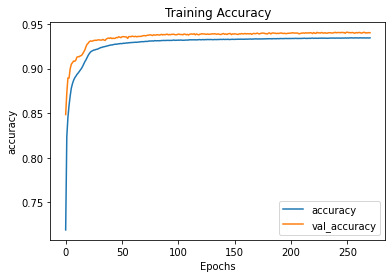

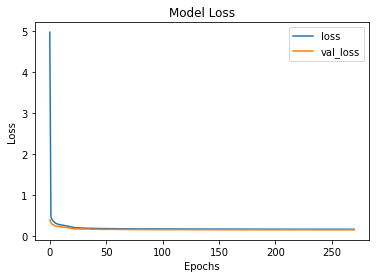

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")